## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df =pd.read_csv("ab_data.csv")
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df_all=df.shape
df_all

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

# Check out the data more :

In [5]:
df.groupby(['group','landing_page']).sum()

user_id  converted
group     landing_page                         
control   new_page        1513548795        234
          old_page      114499747482      17489
treatment new_page      114482634662      17264
          old_page        1545113364        250

#### d. The proportion of users converted.

In [6]:
len(df[df['converted'] > 0])/df.shape[0]

0.11965919355605512

In [7]:
#Or , Easier way:

df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df1=df.count()[0]
new_page1 = df.query('landing_page == "new_page" and group == "treatment" ').count()[0]
old_page1 = df.query('landing_page == "old_page" and group == "control" ').count()[0]
df1-(new_page1+old_page1)

3893

In [9]:
#To ensure that it is a correct operation:

new_page_c=df[df.landing_page=='new_page']
new_page_c=new_page_c.sort_values('group',ascending=False)
new_page_c=new_page_c[new_page_c.group=='control']
sum_new_page_c=new_page_c.loc[new_page_c.converted>=0]
sum_new_page_c=sum_new_page_c['converted'].value_counts()

old_page=df[df.landing_page=='old_page']
old_page=old_page.sort_values('group',ascending=False)
old_page=old_page[old_page.group=='treatment']
sum_old_page=old_page.loc[old_page.converted>=0]
sum_old_page=sum_old_page['converted'].value_counts()
sum_new_page_c+sum_old_page

0    3409
1     484
Name: converted, dtype: int64

# = 3893



f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


# No,
### -no data appears to be missing, which is a good start



..

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2= df[((df['landing_page']=="new_page") == (df['group']=='treatment'))]

df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page'))].nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

### user_id         290584

In [83]:
#Or :
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [21]:
df2['user_id'].drop_duplicates()

0         851104
1         804228
2         661590
3         853541
4         864975
           ...  
294473    751197
294474    945152
294475    734608
294476    697314
294477    715931
Name: user_id, Length: 290584, dtype: int64

In [22]:
df2.loc[df2['user_id'].duplicated(keep=False),:] 

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [24]:
df2.shape

(290584, 5)

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [23]:
df2.drop([2893],inplace=True)


/Users/losh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [87]:
r=(df2.query('converted == 1').user_id).count()
t=(df2.query('converted >= 0').user_id).count()
s= r/t
s

0.11959708724499628

In [88]:
##or :
df2[df2['converted'] >= 0]['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [89]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [90]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [91]:
len(df[df['landing_page'] == 'new_page'])/df.shape[0]

0.5

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

# Through previous statistics:
Obviously, the old page conversions percentage = 0.1203  = 12.03%
As for the new page = 0.1188 ،That's 11.88%.

It is insufficient or conclusive evidence as the differences between the percentages are slight, estimated at 0.15% for the old page.
A small increase indicates that the preference now is for the old page.

### -First judgment: There is no preference for the new page

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### The statistics will revolve around these two points:
The first point if: $H_{0}$ 

That is, the new page is only good, or basically not as good as the old page
                          
                     
( **$p_{new}$** )  -  ( **$p_{old}$** ) <=  0

The second point if: $H_{1}$

This is if the new page is better than the old one "and this is what we mainly assume through statistical operations now."
                       
( **$p_{new}$** )  -  ( **$p_{old}$** ) >  0





`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [92]:
#I'll be showing this schedule because I'll need it later

df2.groupby(['landing_page','converted']).count()

user_id  timestamp   group
landing_page converted                            
new_page     0           128046     128046  128046
             1            17264      17264   17264
old_page     0           127785     127785  127785
             1            17489      17489   17489

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [93]:
the_mean_new=df2.converted.mean()
the_mean_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [94]:
the_mean_old=df2.converted.mean()
the_mean_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [95]:
#Through the previous table

n_new=145310
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [96]:
#Through the previous table
n_old=145274
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [97]:
new_page_converted=np.random.binomial(1,the_mean_new,n_new)
new_page_converted.mean()

0.1184639735737389

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [98]:
old_page_converted=np.random.binomial(1,the_mean_old,n_old)
old_page_converted.mean()

0.12073736525462229

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [99]:
Pnew_Pold=new_page_converted.mean() - old_page_converted.mean()
Pnew_Pold

-0.0022733916808833909

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [100]:
new_converted_simulation=np.random.binomial(n_new,the_mean_new,10000)/n_new
new_converted_simulation

array([ 0.11935173,  0.11878054,  0.11955819, ...,  0.11961324,
        0.11955819,  0.11993669])

In [101]:
old_converted_simulation=np.random.binomial(n_old,the_mean_old,10000)/n_old
old_converted_simulation

array([ 0.11927117,  0.11922299,  0.11914038, ...,  0.11864477,
        0.12002148,  0.12105401])

In [102]:
p_diffs=new_converted_simulation-old_converted_simulation
p_diffs=np.array(p_diffs)

In [103]:
old_converted_simulation.mean(),new_converted_simulation.mean()

(0.11961053664110577, 0.11959233638428186)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

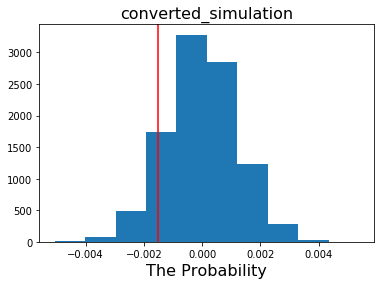

In [104]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs);
plt.xlabel("The Probability", fontsize=16);
plt.title("converted_simulation", fontsize=16)
plt.axvline(x=(-0.0015),color='r');

#o.oo15=0.15%=Difference ratio

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [105]:
#old_page_converted.mean()-new_page_converted.mean()

(0.11880806551510564) - ( 0.1203863045004612)


-0.0015782389853555567

In [106]:
obs_diff =old_page_converted.mean()- new_page_converted.mean()
(p_diffs > obs_diff).mean()


0.030300000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

-
         

The stats were about (P_value), a measure of the likelihood of an alternate's conversion rate, "since our hypothesis was based on the probability that the new page was better than the old page
In this case, looking for one of the two is to check the error rate of 5%:
         
          1) P_value> 5% The stats here are weaker than the error theory
          2) P_value <= 5% The stats here are stronger than the error theory
         
* Regarding our results, we note that: (P_value) is greater than 5%,
Meaning that there is no priority or preference here for the new page according to the above terms





-

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [107]:
import statsmodels.api as sm
from pandas.core import datetools
convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [108]:
zـscore, p_value = sm.stats.proportions_ztest([convert_old , convert_new], [n_old , n_new])
zـscore, p_value

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Question 1: What does (zـscore) mean ?!
It is the difference between the transformation rates and the null theory, since its statistically significant amount here is equal to 1.31, which is somewhat close to the mean, and since the probability value that rejects the null theory, z_tes measures the standard deviation, also through both zـscore, p-value. The conversion rates are not statistically different from each other, and it is clear that the test agrees with the previous results

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Linear regression, which connects between the independent variable (X) and the dependent variable (Y) through which we can compare a number of variables and values (y) which are connected successively with (x), the result will be only one answer of two possibilities for that we depend on the logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [109]:
df2['intercept']=1
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2[['control','ab_page']]=pd.get_dummies(df2['group'])
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [110]:
from scipy import stats
stats.chisqprob=lambda chisq,df:stats.chi2.sf(chisq,df)

the_model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
the_result=the_model.fit()
the_result.summary()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Oct 2020   Pseudo R-squ.:               8.077e-06
Time:                        04:50:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [122]:
np.exp(the_result.params)
1/np.exp(the_result.params)



intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Note that the probability value of the input is (ab_page) = (0.190), Since it is:
                                
                                   ( 0.190 > 0.05 )
                                   
 If the results of rejecting the null hypothesis are not achieved, then we can deduce from the statistics that the tests on the new page prove that the new page is either equal to the old page or is less effective than it.


For the second part tests, the statistical criteria were about conversion rates between users between the old page and the new page, where we were comparing the differences between the independent variable X and the dependent variable Y (logistic regression)





.
.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### - It is good to include many influencing factors to know the extent of the impact, some factors that may help predict the future in the conversion process, some factors that give a written study that shows the extent of interaction between pages and between users, for example there are strong influencing factors: “Age, Cultural and social stage, target material, gender, "but it should be added with caution. We do not want to add what might cause a problem in analyzing the data, giving false impressions or outliers.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [112]:
countries_df = pd.read_csv('countries.csv')
df3 = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,control,ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

# conclusions based on the results :  

### I will use here a very traditional statistical method to compare the three countries and search if they need a new page or can suffice with the old page based on the results of the lineage, 
## "All roads lead to Rome, is this not true ?!"
.
.

In [121]:
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
country_df3=df3[df3.converted==1]
country_df3.groupby(['country','converted']).count()
country_df3.groupby(['landing_page','CA', 'UK', 'US']).count()


country  timestamp  group  converted  intercept  \
landing_page CA UK US                                                    
new_page     0  0  1     12072      12072  12072      12072      12072   
                1  0      4375       4375   4375       4375       4375   
             1  0  0       817        817    817        817        817   
old_page     0  0  1     12270      12270  12270      12270      12270   
                1  0      4364       4364   4364       4364       4364   
             1  0  0       855        855    855        855        855   

                       new_page  old_page  control  ab_page  
landing_page CA UK US                                        
new_page     0  0  1      12072     12072    12072    12072  
                1  0       4375      4375     4375     4375  
             1  0  0        817       817      817      817  
old_page     0  0  1      12270     12270    12270    12270  
                1  0       4364      4364     4364     4364  
             1  0  0        855       855      855      855

In [114]:
new_page_US=((12072)/(12072+12270))*100
new_page_US

49.5932955385753

In [115]:
old_page_US=((12270)/(12072+12270))*100
old_page_US

50.4067044614247

#### -The conversion rate for the new page in the United States is estimated at 49.59%.
#### While the old page percentage = 50.40%
#### The difference = 0.81%, which is in favor of the old page, meaning it is less than 1%.
#### We note from the previous that the new page does not have any priority here

..

In [116]:
new_page_Uk=((4375)/(4375+4364))*100
new_page_Uk

50.06293626273028

In [117]:
old_page_Uk=((4364)/(4375+4364))*100
old_page_Uk

49.93706373726971

### The conversion rate for the new page in the uk is estimated at 50.06%.
#### While the old page percentage = 49.93%
#### The difference = 0.13%, which is in favor of the new page, i.e. less than 1%. The percentage is
#### negligible and does not have any significant impact on the transformation to the new page, so we can conclude here that based on previous statistics, the new page with a difference of 0.13% does not have any preference. this too

# .
.


In [118]:
new_page_ca=((817)/(817+855))*100
new_page_ca

48.86363636363637

In [119]:
old_page_ca=((855)/(817+855))*100
old_page_ca

51.13636363636363

#### The conversion rate for the new page in the UK is estimated at 48.86%.
While the old page percentage = 51.13%
The difference = 2.27%, which is in favor of the old page, the preference here is for the old page, meaning that the new page has no clear or effective effect.

#### Based on the previous ratios of the three countries, we note that there is no preference or influence for the new page, and therefore I give a recommendation to stay on the old page because it is more effective.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [120]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0